# "[속보]", 180일(매일), 관련도순, 상위20개 기사

In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service

# ChromeDriver 경로 설정
driver_path = "/Users/leesangwon/Desktop/chromedriver-mac-arm64/chromedriver"  # 여기에 ChromeDriver의 경로를 입력
service = Service(driver_path)

# 웹드라이버 초기화
driver = webdriver.Chrome(service=service)

### 테스트

In [8]:
# 한글 인코딩
import urllib.parse

text = "[속보]"

# URL 인코딩
encoded_text = urllib.parse.quote(text)

year = "2024"
month = "02"
start_d = "15"
end_d = "31"


# 정렬 옵션 sort=0 : 관련도순    sort=1 : 최신순    sort=2 : 오래된순             # 언론사 옵션 mynews=0 : 전체    mynews=1 : 일간지
# 오래된순 정렬, 일간지 언론사
# url = f"https://search.naver.com/search.naver?where=news&query={encoded_text}&sm=tab_opt&sort=2&photo=0&field=0&pd=3&ds={year}.{month}.{start_d}&de={year}.{month}.{end_d}&docid=&related=0&mynews=1&office_type=3&office_section_code=0&news_office_checked=&nso=so%3Ar%2Cp%3Afrom{year}{month}{start_d}to{year}{month}{end_d}&is_sug_officeid=0&office_category=1&service_area=0"
# 관련도순 정렬, 전체 언론사
url = f"https://search.naver.com/search.naver?where=news&query={encoded_text}&sm=tab_opt&sort=0&photo=0&field=0&pd=3&ds={year}.{month}.{start_d}&de={year}.{month}.{end_d}&docid=&related=0&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so%3Ar%2Cp%3Afrom{year}{month}{start_d}to{year}{month}{end_d}&is_sug_officeid=0&office_category=0&service_area=0"


print(url)


# 웹사이트 열기
driver.get(url)

https://search.naver.com/search.naver?where=news&query=%5B%EC%86%8D%EB%B3%B4%5D&sm=tab_opt&sort=0&photo=0&field=0&pd=3&ds=2024.02.15&de=2024.02.31&docid=&related=0&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so%3Ar%2Cp%3Afrom20240215to20240231&is_sug_officeid=0&office_category=0&service_area=0


### 최종 월별 크롤링 코드

In [44]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import urllib.parse
import time
import pandas as pd

# 데이터프레임 리스트 초기화
all_data = []

#####################################################
# 검색어, 연도, 월 설정
text = "[속보]"
year = ['2024']
month = ['05']
#####################################################

# ChromeDriver 경로 설정
driver_path = "/Users/leesangwon/Desktop/chromedriver-mac-arm64/chromedriver"  # 여기에 ChromeDriver의 경로를 입력
service = Service(driver_path)

# 웹드라이버 초기화
driver = webdriver.Chrome(service=service)

# 연도, 월을 순회하며 크롤링
for y in year:
    for m in month:
        # 월의 마지막 날짜 계산
        if m == '01' or m == '03' or m == '05' or m == '07' or m == '08' or m == '10' or m == '12':
            last_day = 31
        elif m == '04' or m == '06' or m == '09' or m == '11':
            last_day = 30
        else:  # 2월 (윤년은 29일)
            last_day = 29

        # 하루 단위로 크롤링
        for day in range(1, last_day + 1):
            start_d = str(day).zfill(2)  # 01, 02, ..., 31 형태로 만들어줌
            end_d = start_d  # 하루 단위로 크롤링하므로 시작일과 종료일이 같음

            # URL 생성
            encoded_text = urllib.parse.quote(text)  # 검색어를 url 인코딩
            url = f"https://search.naver.com/search.naver?where=news&query={encoded_text}&sm=tab_opt&sort=0&photo=0&field=0&pd=3&ds={y}.{m}.{start_d}&de={y}.{m}.{end_d}&docid=&related=0&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so%3Ar%2Cp%3Afrom{y}{m}{start_d}to{y}{m}{end_d}&is_sug_officeid=0&office_category=0&service_area=0"

            # 페이지 열기
            driver.get(url)

            # 스크롤 1~2번 내리기
            last_height = driver.execute_script("return document.body.scrollHeight")
            for _ in range(2):  # 1~2번 스크롤 내리기
                driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
                time.sleep(2)
                new_height = driver.execute_script("return document.body.scrollHeight")
                if new_height == last_height:
                    break
                last_height = new_height

            # 기사 제목, 날짜, 스크립트 크롤링
            titles = driver.find_elements(By.CSS_SELECTOR, ".news_tit")
            dates = driver.find_elements(By.CSS_SELECTOR, ".info_group > span")
            scripts = driver.find_elements(By.CSS_SELECTOR, ".dsc_txt_wrap")
            press = driver.find_elements(By.CSS_SELECTOR, ".info_group > a.press")

            # 상위 20개 기사만 저장
            for title, date, script, p in zip(titles[:20], dates[:20], scripts[:20], press[:20]):
                all_data.append({
                    "Title": title.text,
                    "Date": date.text,
                    "Press": p.text,
                    "Description": script.text
                })

# 데이터프레임 생성 및 저장
df1 = pd.DataFrame(all_data)
df1.to_csv(f"/Users/leesangwon/Downloads/{text}_{month}월_news_data.csv", index=False)

# 드라이버 종료
driver.quit()

In [45]:
import pandas as pd
aaa = pd.read_csv(f"/Users/leesangwon/Downloads/[속보]_['05']월_news_data.csv")
aaa

,Title,Date,Press,Description
0,[속보]4월 수출 13.8% 증가…대미 수출 역대 최대 기록,2024.05.01.,경향신문언론사 선정,한국의 4월 수출이 지난해보다 13.8% 증가하면서 7개월 연속 ‘수출 플러스’ 행...
1,"[속보]여야, 이태원특별법 합의…2일 본회의서 처리",2024.05.01.,국제신문언론사 선정,여야가 이태원 참사 특별법(10·29이태원참사 피해자 권리보장과 진상규명 및 재발방...
2,[속보] 與 사무총장에 배준영 내정…부총장에 서지영·김종혁,2024.05.01.,문화일보언론사 선정,국민의힘은 1일 사무총장 직무대행인 배준영(사진) 의원을 사무총장으로 내정했다고 밝...
3,[속보] 4월 수출 13.8%↑…7개월 연속 '수출 플러스',2024.05.01.,한국경제언론사 선정,한국의 4월 수출이 지난해보다 13.8% 증가하면서 7개월 연속 '수출 플러스'를 ...
4,"[속보] 대통령실 ""이태원특별법 여야 합의 환영... 협치 성과""",2024.05.01.,한국일보언론사 선정,여야가 1일 '이태원 참사 진상규명 특별법'을 처리하기로 합의하자 대통령실은 즉각 ...
...,...,...,...,...
615,"[속보] 대법원, 김의철 전 KBS사장 해임처분 집행정지 신청 기각",2024.05.31.,미디어오늘언론사 선정,대법원이 지난 29일 김의철 전 KBS 사장이 윤석열 대통령을 상대로 제기한 해임처...
616,"[속보] 尹정부, 원전 3기 더 짓는다…야당·환경단체 반발 불가피",2024.05.31.,국제신문언론사 선정,첨단산업 신규 투자 등에 따른 전력수요 급증에 대응하기 위해 2038년까지 최대 3...
617,"[속보] “바이든, ‘美 무기 사용’ 러시아 영토공격 일부 허용”",2024.05.31.,세계일보언론사 선정,기사 특정내용과 무관. 바흐무트=AP/뉴시스 조 바이든 행정부가 비밀리에 우크라이나...
618,[속보] 강남 오피스텔에서 모녀 살해한 뒤 도주...60대 용의자 체포,2024.05.31.,YTN언론사 선정,강남에 있는 오피스텔에서 50대 여성과 그 딸에게 흉기를 휘둘러 숨지게 한 뒤 도주...


In [46]:
date_group = aaa.groupby('Date').size().reset_index(name='Count')
date_group.head(50)

,Date,Count
0,1면 1단,2
1,2024.05.01.,20
2,2024.05.02.,20
3,2024.05.03.,20
4,2024.05.04.,20
5,2024.05.05.,20
6,2024.05.06.,20
7,2024.05.07.,20
8,2024.05.08.,20
9,2024.05.09.,20


### NLP

In [37]:
!pip install konlpy
!pip install wordcloud
!pip install koreanize-matplotlib
import koreanize_matplotlib

In [56]:
import pandas as pd
file_path = "/Users/leesangwon/Documents/태블로대시보드용_금융데이터/속보_기간별_제목_4.csv"  # CSV 파일 경로
aaa = pd.read_csv(file_path)
aaa

,Term,Title,Date,Press
0,4,[속보] 부산 미군기지에서 불...대응 1단계 발령,3주 전,YTN언론사 선정
1,4,"[속보] 尹 “우크라 살상무기 지원, 北 활동 따라 검토”",3주 전,매일경제언론사 선정
2,4,"[속보] 러 하원, 북러 조약 만장일치 비준",3주 전,뉴시스언론사 선정
3,4,"[속보] 우크라 ""북한군 2000명, 훈련 마치고 러 서부로 이동""",3주 전,중앙일보언론사 선정
4,4,[속보]3분기 韓경제 0.1% 성장…예상 밖 성장쇼크,3주 전,헤럴드경제언론사 선정
...,...,...,...,...
795,4,[속보] 9월 생산·소비 동반 감소…반도체 생산 2.6%↓,2주 전,강원도민일보
796,4,"[속보] 삼성전자, 3분기 영업익 9.18조…10조 원 하회",2주 전,서울경제언론사 선정
797,4,"[속보] 명태균 ""김건희, '선생님, 윤상현한테 전화했습니다'라 말했다""",2주 전,더팩트
798,4,"[속보] 민주, 윤석열-명태균 통화 녹음 공개…""尹 공천개입 입증""",2주 전,뉴스1언론사 선정


In [57]:
from konlpy.tag import Okt

def okt_tokenizer(text, return_nouns_only=True):
    """ 
    input: korean text
    output: tokens
    
    if return_nouns_only option is True, only nouns will be extracted.
    """
    okt = Okt()
    
    if return_nouns_only:
        tokens = okt.nouns(text)
    else:
        tokens = okt.morphs(text)
    
    # you can refer to the site below that lists Korean stopwords
    # https://www.ranks.nl/stopwords/korean
    stopwords = ['입니다', '은', '는', '이', '가', '이거', '저거', '그거', '여기', '이쪽', ]
    tokens = [n for n in tokens if n not in stopwords]
    return tokens

In [58]:
# Combine 'Title' and 'Description' columns into a list of words, split by commas
combined_list = []

# Iterate through each row in the dataframe
for _, row in aaa.iterrows():
    title_words = row['Title'].split(' ')
    #description_words = row['Description'].split(' ') if isinstance(row['Description'], str) else []
    combined_list.extend(title_words)

# The combined list of words
combined_list

['[속보]',
 '부산',
 '미군기지에서',
 '불...대응',
 '1단계',
 '발령',
 '[속보]',
 '尹',
 '“우크라',
 '살상무기',
 '지원,',
 '北',
 '활동',
 '따라',
 '검토”',
 '[속보]',
 '러',
 '하원,',
 '북러',
 '조약',
 '만장일치',
 '비준',
 '[속보]',
 '우크라',
 '"북한군',
 '2000명,',
 '훈련',
 '마치고',
 '러',
 '서부로',
 '이동"',
 '[속보]3분기',
 '韓경제',
 '0.1%',
 '성장…예상',
 '밖',
 '성장쇼크',
 '[속보]',
 '검찰,',
 "'공직선거법",
 "위반'",
 '김혜경',
 '벌금',
 '300만원',
 '재구형',
 '[속보]상급종합병원',
 '구조전환에',
 '세브란스·고대안암',
 '등',
 '8개',
 '병원',
 '선정',
 '[속보]',
 '검찰',
 "'공직선거법",
 "위반'",
 '김혜경에',
 '벌금',
 '300만원',
 '재구형',
 '[속보]SK하이닉스',
 '3분기',
 '영업익',
 '7조...반도체이익',
 '삼성전자',
 '넘어',
 '[속보]',
 'SK하이닉스',
 '지붕',
 '뚫었다...역대',
 '최대',
 '영업이익',
 '7조300억',
 '원으로',
 '신...',
 '[속보]',
 '상급병원',
 '구조전환',
 '지원사업에',
 '세브란스',
 '등',
 '8개',
 '병원',
 '1차',
 '선정',
 '[속보]SK하이닉스',
 '3분기',
 '영업익',
 '7조...반도체이익',
 '삼성전자',
 '넘어',
 '[속보]',
 '美',
 '“북한군',
 '3천명',
 '러서',
 '훈련중…우크라전',
 '투입땐',
 '정당한',
 '표적”',
 '[속보]',
 'SK하이닉스',
 '지붕',
 '뚫었다...역대',
 '최대',
 '영업이익',
 '7조300억',
 '원으로',
 '신...',
 '[속보]',
 '부산',
 '주한미군',
 '55보급창서',
 '큰',
 '불

In [59]:
result = ' '.join(combined_list)  # 공백으로 결합
print(result)

[속보] 부산 미군기지에서 불...대응 1단계 발령 [속보] 尹 “우크라 살상무기 지원, 北 활동 따라 검토” [속보] 러 하원, 북러 조약 만장일치 비준 [속보] 우크라 "북한군 2000명, 훈련 마치고 러 서부로 이동" [속보]3분기 韓경제 0.1% 성장…예상 밖 성장쇼크 [속보] 검찰, '공직선거법 위반' 김혜경 벌금 300만원 재구형 [속보]상급종합병원 구조전환에 세브란스·고대안암 등 8개 병원 선정 [속보] 검찰 '공직선거법 위반' 김혜경에 벌금 300만원 재구형 [속보]SK하이닉스 3분기 영업익 7조...반도체이익 삼성전자 넘어 [속보] SK하이닉스 지붕 뚫었다...역대 최대 영업이익 7조300억 원으로 신... [속보] 상급병원 구조전환 지원사업에 세브란스 등 8개 병원 1차 선정 [속보]SK하이닉스 3분기 영업익 7조...반도체이익 삼성전자 넘어 [속보] 美 “북한군 3천명 러서 훈련중…우크라전 투입땐 정당한 표적” [속보] SK하이닉스 지붕 뚫었다...역대 최대 영업이익 7조300억 원으로 신... [속보] 부산 주한미군 55보급창서 큰 불…대응 2단계 [속보] 윤 대통령 "北 러시아 파병은 도발…좌시하지 않을 것" [속보] ‘HBM 매출 330% 증가’ SK하이닉스, 3분기 영업익 7조300억원 ‘... [속보] 검찰, '공직선거법 위반' 김혜경 3백만 원 구형 [속보] 이병노 담양군수 항소심도 당선무효형 [속보] 法 "공정위, 로톡 징계 변협 과징금 취소해야" [속보]‘김 여사 비난 전단’ 담은 오물풍선 北 살포…대통령실 청사에... [속보] 3분기 실질GDP 성장률 0.1%에 그쳐···수출은 0.4% 감소 [속보] 검찰 '공직선거법위반' 김혜경 벌금 300만원 구형 [속보]한동훈 “당 대표, 원내든 원외든 당 전체업무 총괄…특별감찰관... [속보] 현대차 3분기 매출 43조 육박 ‘역대 최대’…영업익은 6.5% 감소 [속보] 윤 대통령 국정지지율 22%…취임 후 최저치 기록 [속보] 이병노 담양군수 항소심도 당선무효형 [속보]용산 대통령실

In [60]:
from konlpy.tag import Okt

okt = Okt()
nouns = okt.nouns(result)  # 명사 추출
print(nouns)

['속보', '부산', '미군기지', '불', '대응', '단계', '발령', '속보', '살상', '무기', '지원', '활동', '검토', '속보', '하원', '북러', '조약', '만장일치', '비준', '속보', '북한', '명', '훈련', '마치', '서부', '이동', '속보', '경제', '성장', '예상', '밖', '성장', '쇼크', '속보', '검찰', '공직선거법', '위반', '김혜경', '벌금', '재', '구형', '속보', '상급', '종합병원', '전환', '세브란스', '안암', '등', '개', '병원', '선정', '속보', '검찰', '공직선거법', '위반', '김혜경', '벌금', '재', '구형', '속보', '하이닉스', '영업', '익', '반도체', '이익', '삼성', '전자', '속보', '하이닉스', '지붕', '역대', '최대', '영업', '이익', '원', '신', '속보', '상급', '병원', '구조', '전환', '사업', '세브란스', '등', '개', '병원', '차', '선정', '속보', '하이닉스', '영업', '익', '반도체', '이익', '삼성', '전자', '속보', '북한', '훈련', '전', '투입', '땐', '표적', '속보', '하이닉스', '지붕', '역대', '최대', '영업', '이익', '원', '신', '속보', '부산', '미군', '보급', '창', '불', '대응', '단계', '속보', '윤', '대통령', '러시아', '파병', '도발', '것', '속보', '매출', '증가', '하이닉스', '영업', '익', '속보', '검찰', '공직선거법', '위반', '김혜경', '백만', '원', '구형', '속보', '이병', '노', '담양', '군수', '항소심', '당선', '무효', '속보', '공정위', '로톡', '징계', '변협', '과징금', '취소', '속보', '김', '여사', '비난', '전단', '물풍선', '살포', '대통령실',

In [61]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 예시 리스트 (단어들이 들어 있는 리스트)

# 리스트를 문자열로 변환 (워드클라우드를 만들기 위해)
text = ' '.join(nouns)

# CountVectorizer를 사용하여 텍스트 벡터화
vectorizer = CountVectorizer(stop_words=None)  # stop_words=None을 사용하여 불용어 제외
X = vectorizer.fit_transform([text])

# 벡터화된 단어와 그 빈도수 출력
word_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray().flatten()))


word_freq_df = pd.DataFrame(word_freq.items(), columns=["Word", "Frequency"])


word_freq_df.to_csv("/Users/leesangwon/Documents/태블로대시보드용_금융데이터/4기간.csv", index=False, encoding="utf-8")

In [ ]:
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import pandas as pd

# 데이터 준비
titles = data['Title'].dropna()
result = ' '.join(titles)  # 'Title' 컬럼의 내용을 하나의 문자열로 결합

# Okt를 이용한 명사 추출
okt = Okt()
nouns = okt.nouns(result)  # 명사만 추출

# 단어 벡터화
text = ' '.join(nouns)  # 명사 리스트를 문자열로 변환
vectorizer = CountVectorizer()
X = vectorizer.fit_transform([text])

# 단어와 빈도수 딕셔너리 생성
word_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray().flatten()))

# 워드 빈도 CSV 저장
word_freq_df = pd.DataFrame(word_freq.items(), columns=["Word", "Frequency"])
file_path = "/mnt/data/1기간.csv"
word_freq_df.to_csv(file_path, index=False, encoding="utf-8")

# 저장된 경로 반환
file_path

{'가가': 2, '가결': 5, '가금': 1, '가까스레': 1, '가까이': 1, '가늠': 1, '가능': 2, '가능성': 5, '가닥': 2, '가담': 1, '가량': 1, '가로': 1, '가방': 5, '가사': 3, '가상': 5, '가석방': 26, '가수': 26, '가스': 3, '가슴': 1, '가야': 2, '가운데': 12, '가자지구': 7, '가장': 3, '가정': 1, '가정법원': 1, '가족': 4, '가중': 10, '가지': 1, '가짜': 1, '가처분': 9, '가치': 4, '가해': 2, '각각': 6, '각자': 2, '각종': 8, '각하': 4, '간담': 4, '간부': 7, '간암': 2, '간의': 1, '간접': 1, '간주': 2, '간첩': 1, '간호': 1, '갈대': 2, '갈등': 6, '갈무리': 1, '감각': 1, '감독': 6, '감사': 2, '감세': 1, '감소': 6, '감정': 1, '감청': 2, '감행': 1, '강경': 1, '강남': 17, '강남구': 3, '강남역': 3, '강도': 2, '강도현': 4, '강동구': 3, '강등': 1, '강력': 2, '강모': 1, '강사': 2, '강성': 1, '강수': 2, '강수량': 1, '강씨': 1, '강원': 4, '강원도': 2, '강제': 2, '강조': 5, '강풍': 1, '강행': 3, '강화': 8, '개국': 2, '개발': 15, '개방': 3, '개봉': 1, '개선': 2, '개시': 3, '개원': 1, '개월': 31, '개인': 9, '개인정보': 2, '개입': 2, '개정': 7, '개정안': 19, '개최': 16, '개편': 2, '개혁': 44, '거대': 3, '거듭': 1, '거래': 17, '거래소': 7, '거론': 3, '거리': 11, '거버넌스': 2, '거부': 3, '거부권': 26, '거절': 2, '거주': 1, '건강': 3, '건물': 5, '건의': 8

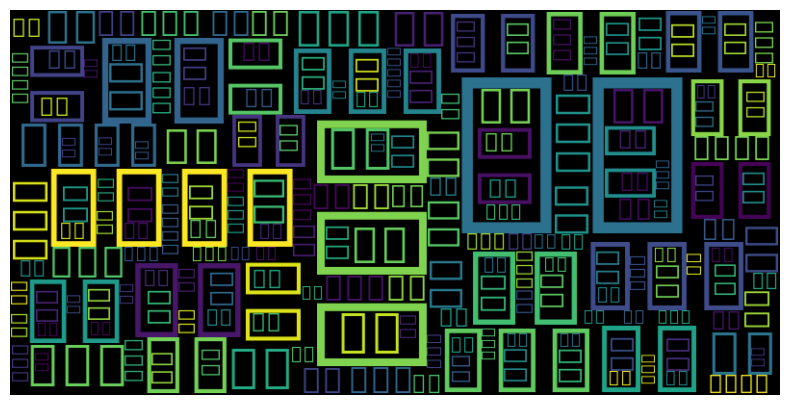

In [52]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 예시 리스트 (단어들이 들어 있는 리스트)

# 리스트를 문자열로 변환 (워드클라우드를 만들기 위해)
text = ' '.join(nouns)

# CountVectorizer를 사용하여 텍스트 벡터화
vectorizer = CountVectorizer(stop_words=None)  # stop_words=None을 사용하여 불용어 제외
X = vectorizer.fit_transform([text])

# 벡터화된 단어와 그 빈도수 출력
word_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray().flatten()))
print(word_freq)

# 워드클라우드 생성
wordcloud = WordCloud(width=800, height=400).generate_from_frequencies(word_freq)

# 워드클라우드 시각화
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [53]:
ddff = pd.DataFrame(list(word_freq.items()), columns=['Word', 'Frequency'])
ddff

ddff.to_csv("/Users/leesangwon/Downloads/예시클라우드용_5월_단어빈도.csv", index=False)

In [16]:
import pandas as pd
from collections import Counter
import re
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# CSV 파일 읽기
file_path = "/Users/leesangwon/Documents/태블로대시보드용_금융데이터/속보_기간별_제목_4.csv"  # CSV 파일 경로
df = pd.read_csv(file_path)

# 텍스트 열 지정 (예: 'text' 열에서 단어 추출)
text_column = "Title"  # CSV 파일 내 텍스트 열 이름
text = " ".join(df[text_column].astype(str))

# CountVectorizer를 사용하여 텍스트 벡터화
vectorizer = CountVectorizer(stop_words=None)  # stop_words=None을 사용하여 불용어 제외
X = vectorizer.fit_transform([text])

# 벡터화된 단어와 그 빈도수 출력
word_freq = dict(zip(vectorizer.get_feature_names_out(), X.toarray().flatten()))
word_freq




# # 데이터 확인
# data

# data.to_csv("/Users/leesangwon/Documents/태블로대시보드용_금융데이터/4기간.csv", index=False, encoding="utf-8")

{'05': 1,
 '07p': 1,
 '09': 1,
 '10': 3,
 '1000': 3,
 '100여개': 1,
 '100일': 3,
 '104': 1,
 '10년': 5,
 '10대': 1,
 '10월': 3,
 '10일': 3,
 '10조': 1,
 '11': 1,
 '110회': 1,
 '1143회': 1,
 '11월': 4,
 '12': 2,
 '12번째': 3,
 '12월': 1,
 '13': 4,
 '132': 1,
 '1390원': 3,
 '13억원': 1,
 '14': 1,
 '1400원대': 1,
 '140여곳': 1,
 '1450원도': 3,
 '148': 1,
 '14건': 1,
 '14만달러설까지': 1,
 '14조원': 1,
 '1500명': 2,
 '150억': 1,
 '155': 1,
 '155mm': 1,
 '15개': 1,
 '15년': 3,
 '16': 2,
 '16p': 1,
 '17': 2,
 '174': 1,
 '17조5731억': 1,
 '18': 3,
 '1834억': 1,
 '18p': 2,
 '18조': 1,
 '19': 1,
 '191': 1,
 '1공장': 1,
 '1단계': 4,
 '1만': 1,
 '1만1000명': 2,
 '1만1천명': 1,
 '1만900여명': 1,
 '1만명': 2,
 '1명': 1,
 '1발': 2,
 '1승': 1,
 '1심': 2,
 '1심서': 1,
 '1심에서': 1,
 '1억원': 1,
 '1월': 1,
 '1월2일': 2,
 '1인당': 2,
 '1조1120억원': 1,
 '1조1566억원': 1,
 '1조2386억': 2,
 '1조3천808억': 1,
 '1조493억': 1,
 '1조6140원': 1,
 '1차': 1,
 '1천명': 1,
 '1패로': 1,
 '1회': 1,
 '1회초': 1,
 '20': 7,
 '2000명': 2,
 '2000원': 1,
 '2009년': 2,
 '201일': 1,
 '2024': 1,
 '2024년': 1,
 '2025년': 1

In [13]:
all_text

'[속보] 부산 미군기지에서 불...대응 1단계 발령 [속보] 尹 “우크라 살상무기 지원, 北 활동 따라 검토” [속보] 러 하원, 북러 조약 만장일치 비준 [속보] 우크라 "북한군 2000명, 훈련 마치고 러 서부로 이동" [속보]3분기 韓경제 0.1% 성장…예상 밖 성장쇼크 [속보] 검찰, \'공직선거법 위반\' 김혜경 벌금 300만원 재구형 [속보]상급종합병원 구조전환에 세브란스·고대안암 등 8개 병원 선정 [속보] 검찰 \'공직선거법 위반\' 김혜경에 벌금 300만원 재구형 [속보]SK하이닉스 3분기 영업익 7조...반도체이익 삼성전자 넘어 [속보] SK하이닉스 지붕 뚫었다...역대 최대 영업이익 7조300억 원으로 신... [속보] 상급병원 구조전환 지원사업에 세브란스 등 8개 병원 1차 선정 [속보]SK하이닉스 3분기 영업익 7조...반도체이익 삼성전자 넘어 [속보] 美 “북한군 3천명 러서 훈련중…우크라전 투입땐 정당한 표적” [속보] SK하이닉스 지붕 뚫었다...역대 최대 영업이익 7조300억 원으로 신... [속보] 부산 주한미군 55보급창서 큰 불…대응 2단계 [속보] 윤 대통령 "北 러시아 파병은 도발…좌시하지 않을 것" [속보] ‘HBM 매출 330% 증가’ SK하이닉스, 3분기 영업익 7조300억원 ‘... [속보] 검찰, \'공직선거법 위반\' 김혜경 3백만 원 구형 [속보] 이병노 담양군수 항소심도 당선무효형 [속보] 法 "공정위, 로톡 징계 변협 과징금 취소해야" [속보]‘김 여사 비난 전단’ 담은 오물풍선 北 살포…대통령실 청사에... [속보] 3분기 실질GDP 성장률 0.1%에 그쳐···수출은 0.4% 감소 [속보] 검찰 \'공직선거법위반\' 김혜경 벌금 300만원 구형 [속보]한동훈 “당 대표, 원내든 원외든 당 전체업무 총괄…특별감찰관... [속보] 현대차 3분기 매출 43조 육박 ‘역대 최대’…영업익은 6.5% 감소 [속보] 윤 대통령 국정지지율 22%…취임 후 최저치 기록 [속보] 이병노 담양군수 항소심도 당선무효형 [속